In [1]:
import pandas as pd
df = pd.read_csv("housing.csv")
df

,title,location,price,area,no_rooms,interior,year
0,ApartmentGroteBickersstraat23H,1013KNAmsterdam(Haarlemmerbuurt),"€2,000permonth",62m²,2rooms,Furnished,NaN
1,HouseSchoolstraat15E,2202HCNoordwijk(KernZee),"€1,800permonth",120m²,5rooms,Upholstered,NaN
2,ApartmentAmundsenlaan,5623PTEindhoven(OudeToren),"€1,795permonth",90m²,3rooms,Furnished,NaN
3,ApartmentC.J.Snuifstraat,7511ZKEnschede(DeBothoven),€850permonth,89m²,3rooms,Furnished,NaN
4,ApartmentAntwerpsestraat,4611AGBergenopZoom(Centrum),€652permonth,36m²,2rooms,Upholstered,NaN
...,...,...,...,...,...,...,...
2075,ApartmentBoomstraat23A,1015LAAmsterdam(Jordaan),"€3,850permonth",125m²,5rooms,Furnished,NaN
2076,RoomDiezerplein,8021CSZwolle(Dieze-Centrum),€475permonth,12m²,1room,NaN,NaN
2077,ApartmentBunderstraat4b,6231ELMeerssen(Meerssen),€780permonth,65m²,4rooms,Upholstered,NaN
2078,HouseKudelstaartseweg,1433GKKudelstaart(Kudelstaart),"€3,200permonth",156m²,5rooms,Furnished,NaN


# Penyesuaian Data

Penyesuaian saya lakukan karena data scraping masih kasar dan perlu diformat ulang agar sesuai dengan yang diinginkan

In [2]:
df.dtypes

title       object
location    object
price       object
area        object
no_rooms    object
interior    object
year        object
dtype: object

In [3]:
df.isna().sum()

title          0
location       0
price          0
area           0
no_rooms       0
interior     244
year        1906
dtype: int64

In [4]:
import re
for i in range(len(df['no_rooms'])):
    df['no_rooms'][i] = list(map(int, re.findall(r'\d+', df['no_rooms'][i])))[0]


In [5]:
for i in range(len(df['price'])):
    df['price'][i]=df['price'][i].replace(',','')
    df['price'][i] = list(map(int, re.findall(r'\d+', df['price'][i])))
    if df['price'][i] == []:
        print('masuk')
        df.T.pop(i)
    else:
        df['price'][i] = df['price'][i][0]

masuk
masuk
masuk


In [6]:
for i in range(len(df['area'])):
    df['area'][i] = list(map(int, re.findall(r'\d+', df['area'][i])))[0]

In [7]:
import numpy as np
for i in range(len(df['year'])):
    s = list(map(int, re.findall(r'^\d{4}$', str(df['year'][i]))))
    if len(s) != 0:
        df['year'][i] = s[0]
    else:
        df['year'][i] = np.nan

In [8]:
df.isna().sum()

title          0
location       0
price          0
area           0
no_rooms       0
interior     244
year        1942
dtype: int64

In [9]:
df['year']=pd.to_numeric(df['year'])
df['area']=pd.to_numeric(df['area'])
df['price']=pd.to_numeric(df['price'])
df['no_rooms']=pd.to_numeric(df['no_rooms'])


In [10]:
df.isna().sum()

title          0
location       0
price          3
area           0
no_rooms       0
interior     244
year        1942
dtype: int64

In [11]:
df = df[df['price'].notna()]

In [12]:
df

,title,location,price,area,no_rooms,interior,year
0,ApartmentGroteBickersstraat23H,1013KNAmsterdam(Haarlemmerbuurt),2000.0,62,2,Furnished,NaN
1,HouseSchoolstraat15E,2202HCNoordwijk(KernZee),1800.0,120,5,Upholstered,NaN
2,ApartmentAmundsenlaan,5623PTEindhoven(OudeToren),1795.0,90,3,Furnished,NaN
3,ApartmentC.J.Snuifstraat,7511ZKEnschede(DeBothoven),850.0,89,3,Furnished,NaN
4,ApartmentAntwerpsestraat,4611AGBergenopZoom(Centrum),652.0,36,2,Upholstered,NaN
...,...,...,...,...,...,...,...
2075,ApartmentBoomstraat23A,1015LAAmsterdam(Jordaan),3850.0,125,5,Furnished,NaN
2076,RoomDiezerplein,8021CSZwolle(Dieze-Centrum),475.0,12,1,NaN,NaN
2077,ApartmentBunderstraat4b,6231ELMeerssen(Meerssen),780.0,65,4,Upholstered,NaN
2078,HouseKudelstaartseweg,1433GKKudelstaart(Kudelstaart),3200.0,156,5,Furnished,NaN


# Pembersihan Data

## Mengidentifikasi & menghapus kolom dengan single value

Proses ini penting karena kolom yang memiliki single value tidak berguna bagi pembentukan model karena memiliki nilai variansi 0

In [13]:
df.nunique()

title       1755
location    1792
price        351
area         219
no_rooms      12
interior       4
year          83
dtype: int64

Karena tidak terdapat kolom yang memiliki single value maka tidak perlu dilakukan penghapusan single value

## Mengidentifikasi & menghapus baris yang memiliki data terduplikasi


Proses ini penting karena baris yang memiliki data sama persis tidak berguna dalam permodelan dan dapat menyebabkan bias ketika data train dan test dipisahkan.

In [14]:
df[df.duplicated()]

,title,location,price,area,no_rooms,interior,year
65,HouseGein-Zuid12,1391GTAbcoude(AbcoudeBuitengebied),3000.0,190,4,Upholstered,NaN
96,ApartmentDeBinderij,1321ECAlmere(Literatuurwijk),1930.0,95,3,Upholsteredorfurnished,NaN
129,ApartmentDeBinderij,1321ECAlmere(Literatuurwijk),1930.0,95,3,Upholsteredorfurnished,NaN
153,StudioWesterstraat,1015MLAmsterdam(Jordaan),1350.0,30,1,Upholstered,NaN
160,ApartmentHoofdweg,1058BCAmsterdam(WestindischeBuurt),3000.0,155,6,Upholstered,NaN
...,...,...,...,...,...,...,...
2016,HouseDonkerslootstraat,3074WERotterdam(Hillesluis),1995.0,143,5,Upholstered,NaN
2017,ApartmentPelsRijckenstraat,6814DKArnhem(Burgemeesterswijk),1300.0,85,2,Upholstered,NaN
2048,ApartmentGroteBickersstraat23H,1013KNAmsterdam(Haarlemmerbuurt),2000.0,62,2,Furnished,NaN
2049,ApartmentBarrierweg227,5622CNEindhoven(Kronehoef),1895.0,135,5,Furnished,NaN


In [15]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(2077, 7)
(1938, 7)


C:\Users\jmspa\AppData\Local\Temp\ipykernel_26040\3288731413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


## Analisa Distribusi Data

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'area'}>],
       [<AxesSubplot:title={'center':'no_rooms'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

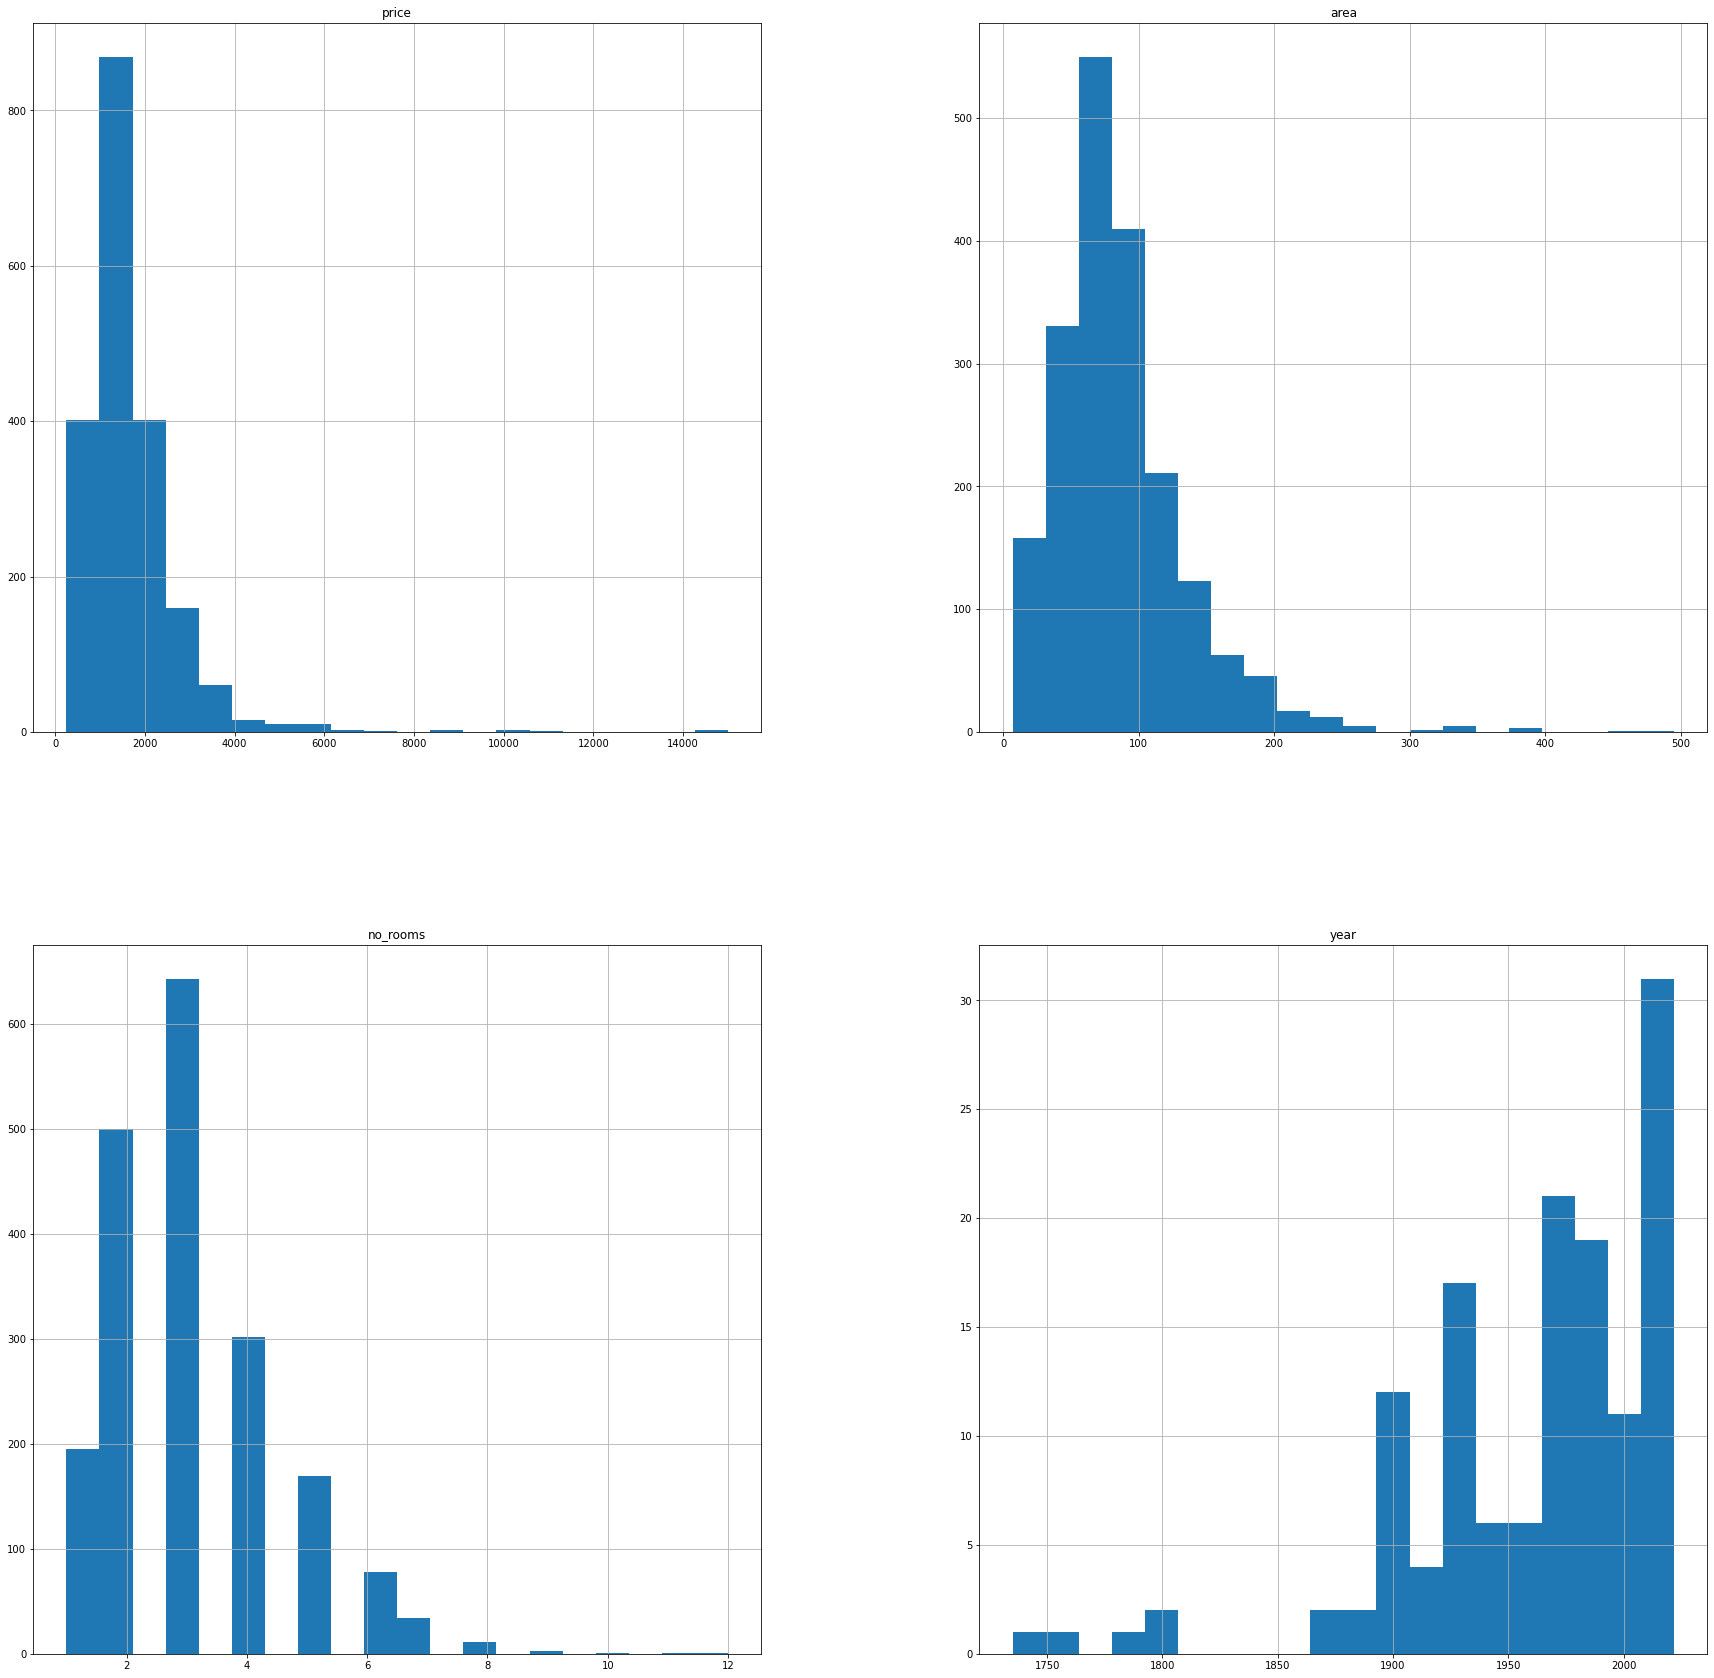

In [16]:
df.hist(figsize = (30,30), bins=20)

(array([1, 2, 3, 4]),
 [Text(1, 0, 'price'),
  Text(2, 0, 'area'),
  Text(3, 0, 'no_rooms'),
  Text(4, 0, 'year')])

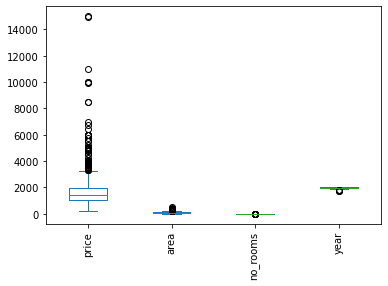

In [17]:
import matplotlib.pyplot as plt
df.plot.box()
plt.xticks(rotation=90)

## Encoding

Karena terdapat data-data non numeric, maka saya melakukan encoding agar model dapat dilatih dengan data-data tersebut.

In [18]:
X, y = df.loc[:, df.columns != 'price'], df['price']
X

,title,location,area,no_rooms,interior,year
0,ApartmentGroteBickersstraat23H,1013KNAmsterdam(Haarlemmerbuurt),62,2,Furnished,NaN
1,HouseSchoolstraat15E,2202HCNoordwijk(KernZee),120,5,Upholstered,NaN
2,ApartmentAmundsenlaan,5623PTEindhoven(OudeToren),90,3,Furnished,NaN
3,ApartmentC.J.Snuifstraat,7511ZKEnschede(DeBothoven),89,3,Furnished,NaN
4,ApartmentAntwerpsestraat,4611AGBergenopZoom(Centrum),36,2,Upholstered,NaN
...,...,...,...,...,...,...
2075,ApartmentBoomstraat23A,1015LAAmsterdam(Jordaan),125,5,Furnished,NaN
2076,RoomDiezerplein,8021CSZwolle(Dieze-Centrum),12,1,NaN,NaN
2077,ApartmentBunderstraat4b,6231ELMeerssen(Meerssen),65,4,Upholstered,NaN
2078,HouseKudelstaartseweg,1433GKKudelstaart(Kudelstaart),156,5,Furnished,NaN


In [19]:
import category_encoders as ce

# encoder = ce.BackwardDifferenceEncoder(cols=df[['title','location','interior']])
# encoder = ce.BaseNEncoder(cols=df[['title','location','interior']])
encoder = ce.BinaryEncoder(cols=df[['title','location','interior']])
# encoder = ce.CatBoostEncoder(cols=df[['title','location','interior']])
# encoder = ce.CountEncoder(cols=df[['title','location','interior']])
# encoder = ce.GLMMEncoder(cols=df[['title','location','interior']])
# encoder = ce.HashingEncoder(cols=[...])
# encoder = ce.HelmertEncoder(cols=[...])
# encoder = ce.JamesSteinEncoder(cols=[...])
# encoder = ce.LeaveOneOutEncoder(cols=[...])
# encoder = ce.MEstimateEncoder(cols=[...])
# encoder = ce.OneHotEncoder(cols=df[['title','location','interior']])
# encoder = ce.OrdinalEncoder(cols=[...])
# encoder = ce.SumEncoder(cols=[...])
# encoder = ce.PolynomialEncoder(cols=[...])
# encoder = ce.TargetEncoder(cols=[...])
# encoder = ce.WOEEncoder(cols=[...])
# encoder = ce.QuantileEncoder(cols=[...])

encoder.fit(X, y)
X_cleaned = encoder.transform(X)
print(X_cleaned)

      title_0  title_1  title_2  title_3  title_4  title_5  title_6  title_7  \
0           0        0        0        0        0        0        0        0   
1           0        0        0        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        0        0        0        0   
4           0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
2075        1        1        0        1        1        0        1        0   
2076        1        1        0        1        1        0        1        1   
2077        1        1        0        1        1        0        1        1   
2078        1        1        0        1        1        0        1        1   
2079        1        1        0        1        1        0        1        1   

      title_8  title_9  ...  location_7

## Imputasi Data

Saya memilih menggunakan KNN imputer karena data kosong berada dalam kolom interior dan year maka kita dapat memerkirakannya berdasarkan hubungannya dengan data-data yang lain (cont. bila rumah memiliki luas yang besar maka cenderung rumah tersebut dibangun pada tahun tertentu). KNN imputer memperhitungkan jarak (Eucledian) terdekat antara data yang hilang dan data training lainnya, dan mengisinya dengan rata-rata nilai disekelilingnya.

In [20]:
df.isna().sum()

title          0
location       0
price          0
area           0
no_rooms       0
interior     240
year        1802
dtype: int64

In [21]:
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
print(df.isna().sum())
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean',missing_values=np.nan)
imputer.fit(X_cleaned)
Xtrans = imputer.transform(X_cleaned)

Xtrans

title          0
location       0
price          0
area           0
no_rooms       0
interior     240
year        1802
dtype: int64


array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.9434e+03],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.9534e+03],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.9766e+03],
       ...,
       [1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.9324e+03],
       [1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.9742e+03],
       [1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.9188e+03]])

In [22]:
# X_inputed = pd.DataFrame(Xtrans, columns = ['title','location','area','no_rooms','interior','year'])
# X_inputed
X_inputed = pd.DataFrame(Xtrans,columns=X_cleaned.columns)
X_inputed

,title_0,title_1,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9,...,location_7,location_8,location_9,location_10,area,no_rooms,interior_0,interior_1,interior_2,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,62.0,2.0,0.0,0.0,1.0,1943.4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,120.0,5.0,0.0,1.0,0.0,1953.4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,90.0,3.0,0.0,0.0,1.0,1976.6
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,89.0,3.0,0.0,0.0,1.0,1981.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,36.0,2.0,0.0,1.0,0.0,2014.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,125.0,5.0,0.0,0.0,1.0,1963.4
1934,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,12.0,1.0,0.0,1.0,1.0,1979.0
1935,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,65.0,4.0,0.0,1.0,0.0,1932.4
1936,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,156.0,5.0,0.0,0.0,1.0,1974.2


## Outlayer Detection

Karena data tidak terdistribusi secara Gaussian dan tidak terdapat data yang terpencil terlalu jauh maka saya memutuskan untuk menggunakan metode Automatic Outlier Detection

In [23]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_inputed, y, test_size=0.25, random_state=1)
print(X_train.shape, y_train.shape)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
print(yhat)
X_train, y_train = X_train.values[yhat!=-1,:],y_train[yhat!=-1]
print(X_train.shape, y_train.shape)

(1453, 28) (1453,)
[1 1 1 ... 1 1 1]
(1370, 28) (1370,)


Untuk metode yang kedua saya menggunakan Interquartile Range (IQR)

In [24]:
y_train.reset_index(drop=True,inplace=True)

In [25]:
y_train

0        720.0
1       1595.0
2       2700.0
3       2750.0
4        720.0
         ...  
1365    1300.0
1366    1250.0
1367    1400.0
1368    1750.0
1369    2450.0
Name: price, Length: 1370, dtype: float64

In [26]:
X_train=pd.DataFrame(X_train,columns=X_cleaned.columns)
X_train

,title_0,title_1,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9,...,location_7,location_8,location_9,location_10,area,no_rooms,interior_0,interior_1,interior_2,year
0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,22.0,1.0,1.0,0.0,1.0,1972.0
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,98.0,3.0,0.0,1.0,0.0,1969.6
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,95.0,3.0,0.0,0.0,1.0,1967.4
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,196.0,8.0,0.0,1.0,1.0,1908.2
4,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,36.0,1.0,0.0,1.0,1.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,83.0,3.0,0.0,1.0,0.0,1977.2
1366,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,100.0,3.0,0.0,1.0,0.0,1967.0
1367,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,70.0,2.0,1.0,0.0,1.0,1981.2
1368,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,108.0,4.0,0.0,1.0,0.0,1973.8


In [27]:
X_train['price']=y_train
new_df = X_train
new_df

,title_0,title_1,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9,...,location_8,location_9,location_10,area,no_rooms,interior_0,interior_1,interior_2,year,price
0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,22.0,1.0,1.0,0.0,1.0,1972.0,720.0
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,98.0,3.0,0.0,1.0,0.0,1969.6,1595.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,95.0,3.0,0.0,0.0,1.0,1967.4,2700.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,196.0,8.0,0.0,1.0,1.0,1908.2,2750.0
4,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,36.0,1.0,0.0,1.0,1.0,2019.0,720.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,83.0,3.0,0.0,1.0,0.0,1977.2,1300.0
1366,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,100.0,3.0,0.0,1.0,0.0,1967.0,1250.0
1367,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,70.0,2.0,1.0,0.0,1.0,1981.2,1400.0
1368,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,108.0,4.0,0.0,1.0,0.0,1973.8,1750.0


# Feature Importance

Pertama untuk melihat feature importance dari masing-masing fitur, saya menggunakan random forest untuk regresi

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X_inputed, y, test_size=0.1, random_state=12)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.00619363, 0.00792226, 0.00844479, 0.00940395, 0.00794341,
       0.01271177, 0.00856022, 0.01425636, 0.00980807, 0.01351705,
       0.01729238, 0.00586348, 0.00645218, 0.00744797, 0.00733219,
       0.01369834, 0.01133837, 0.00935287, 0.01251799, 0.0121275 ,
       0.01475205, 0.01042822, 0.61963994, 0.05967848, 0.01078263,
       0.01588847, 0.02226786, 0.04437756])

<BarContainer object of 28 artists>

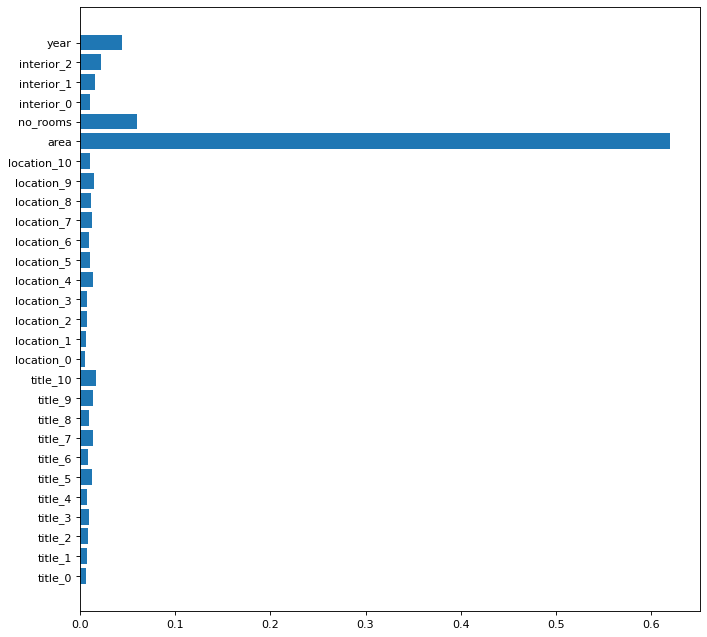

In [29]:
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
plt.barh(X_cleaned.columns, rf.feature_importances_)

## Feature Selection & Modeling

Untuk melakukan seleksi fitur, saya memilih menggunakan RFE karena lebih fleksibel dan dapat menggunakan algoritma-algoritma yang berbeda untuk mengindikasikan variable importance

In [30]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression #oke
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RANSACRegressor
from numpy import mean
from numpy import std

rfe = RFE(estimator=RandomForestRegressor(n_estimators=100), n_features_to_select=5)


model = RANSACRegressor(random_state=0)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_inputed, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -478.151 (61.437)


In [31]:
from sklearn.linear_model import RANSACRegressor
reg = RANSACRegressor(random_state=0).fit(X, y)
print(reg.score(X,
print(reg.predict(X[:1,]))


ValueError: could not convert string to float: 'ApartmentGroteBickersstraat23H'